## 1. Data importation 

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#ใช้ Pandas ในการนำเข้าข้อมูล 
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#แสดงข้อมูลสรุปเกี่ยวกับ DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 2. Exploratory Data Analysis

In [4]:
#แสดงสถิติเบื้องต้นเกี่ยวกับข้อมูลใน DataFrame(df)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
#กรองข้อมูลใน DataFrame(df) โดยเลือกเฉพาะข้อมูลที่มี age มากกว่าหรือเท่ากับ 18 ปีเท่านั้น
df=df[df['age']>=18]
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
#ตรวจสอบและนับจำนวนค่าที่หายไป (NaN) ใน DataFrame(df)
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  181
smoking_status         0
stroke                 0
dtype: int64

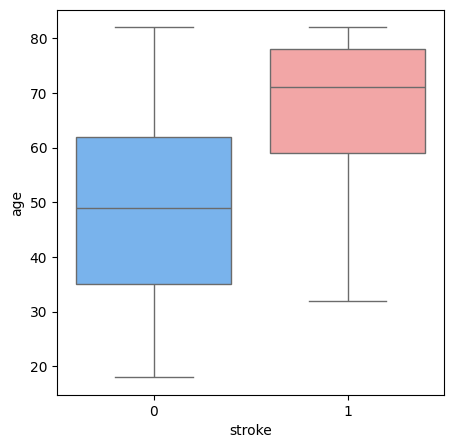

In [7]:
#สร้างกราฟกล่อง (box plot) เพื่อแสดงการกระจายตัวอายุ (age) ของผู้ที่มีและไม่มีอาการโรคหลอดเลือดสมอง
plt.figure(figsize=(5,5))
sns.boxplot(df,x='stroke',y='age',palette=['#66B3FF','#FF9999'])
plt.savefig('box plot_age.png')
plt.show()

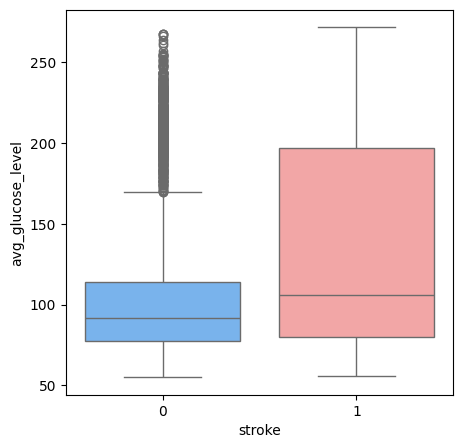

In [8]:
#สร้างกราฟกล่อง (box plot) เพื่อแสดงการกระจายตัวระดับน้ำตาลในเลือดเฉลี่ย (average glucose level) ของผู้ที่มีและไม่มีอาการโรคหลอดเลือดสมอง
plt.figure(figsize=(5,5))
sns.boxplot(df,x='stroke',y='avg_glucose_level',palette=['#66B3FF','#FF9999'])
plt.savefig('box plot_avg glucose.png')
plt.show()

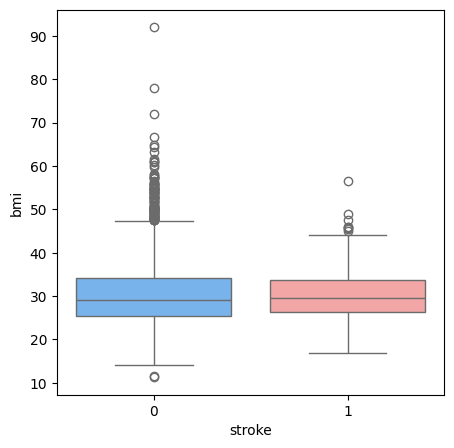

In [9]:
#สร้างกราฟกล่อง (box plot) เพื่อแสดงการกระจายตัวค่าดัชนีมวลกาย (BMI) ของผู้ที่มีและไม่มีอาการโรคหลอดเลือดสมอง
plt.figure(figsize=(5,5))
sns.boxplot(df,x='stroke',y='bmi',palette=['#66B3FF','#FF9999'])
plt.savefig('box plot_BMI.png')
plt.show()

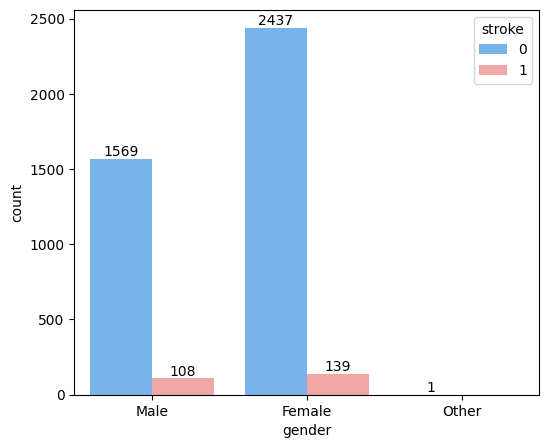

In [13]:
#สร้างกราฟแท่ง (bar plot) เพื่อแสดงจำนวนผู้ป่วยตามเพศ (gender) โดยแบ่งกลุ่มตามสถานะการมีโรคหลอดเลือดสมอง
plt.figure(figsize=(6,5))
df['stroke'] = df['stroke'].astype(str) #แปลงค่าของคอลัมน์ stroke ให้เป็นประเภทสตริง (string) เพื่อให้สามารถใช้เป็นตัวแปรในกราฟได้
ax = sns.countplot(df, x='gender', hue='stroke', hue_order=['0','1'] ,palette=['#66B3FF','#FF9999'])
for container in ax.containers:
    ax.bar_label(container) #ใช้ลูปเพื่อเพิ่มป้ายชื่อ (label) จำนวนผู้ป่วยในแต่ละแท่งของกราฟ ทำให้เห็นจำนวนที่ชัดเจน
plt.savefig('bar plot_gender.png')
plt.show()

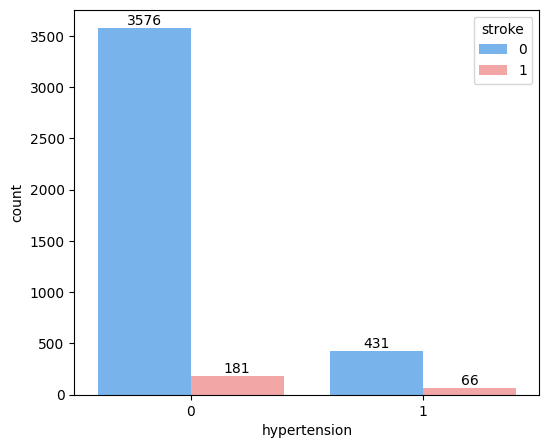

In [18]:
#สร้างกราฟแท่ง (bar plot) เพื่อแสดงจำนวนผู้ป่วยตามสถานะของความดันโลหิตสูง (hypertension) โดยแบ่งกลุ่มตามสถานะการมีโรคหลอดเลือดสมอง
plt.figure(figsize=(6,5))
ax = sns.countplot(df, x='hypertension', hue='stroke', hue_order=['0','1'], palette=['#66B3FF','#FF9999'])
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('bar plot_hypertension.png')
plt.show()

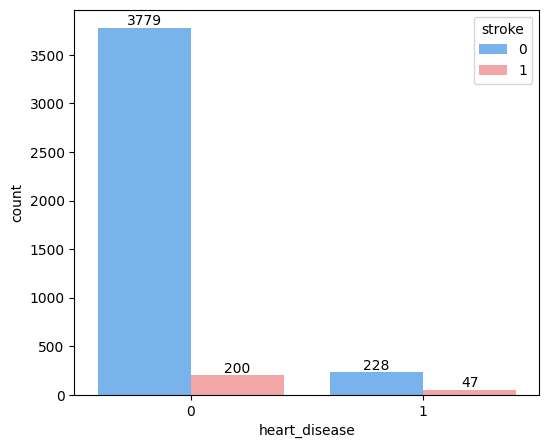

In [15]:
#สร้างกราฟแท่ง (bar plot) เพื่อแสดงจำนวนผู้ป่วยตามสถานะของโรคหัวใจ (heart disease) โดยแบ่งกลุ่มตามสถานะการมีโรคหลอดเลือดสมอง
plt.figure(figsize=(6,5))
ax = sns.countplot(df, x='heart_disease', hue='stroke', hue_order=['0','1'], palette=['#66B3FF','#FF9999'])
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('bar plot_heart disease.png')
plt.show()

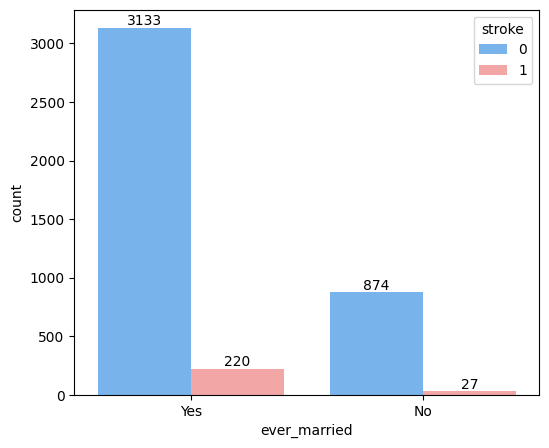

In [19]:
#สร้างกราฟแท่ง (bar plot) เพื่อแสดงจำนวนผู้ป่วยตามสถานะการแต่งงาน (ever married) โดยแบ่งกลุ่มตามสถานะการมีโรคหลอดเลือดสมอง
plt.figure(figsize=(6,5))
ax = sns.countplot(df, x='ever_married', hue='stroke', hue_order=['0','1'], palette=['#66B3FF','#FF9999'])
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('bar plot_married.png')
plt.show()

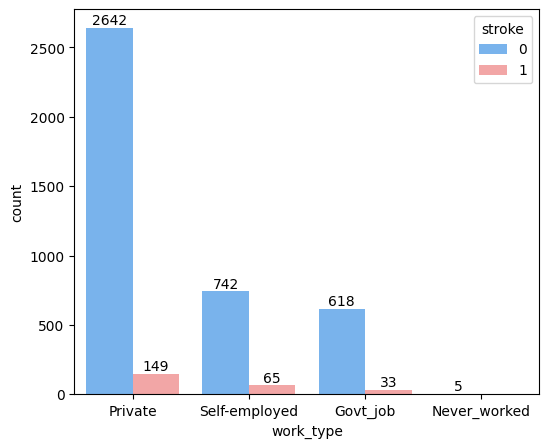

In [21]:
#สร้างกราฟแท่ง (bar plot) เพื่อแสดงจำนวนผู้ป่วยตามประเภทการทำงาน (work_type) โดยแบ่งกลุ่มตามสถานะการมีโรคหลอดเลือดสมอง
plt.figure(figsize=(6,5))
ax = sns.countplot(df, x='work_type', hue='stroke', hue_order=['0','1'], palette=['#66B3FF','#FF9999'])
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('bar plot_work type.png')
plt.show()

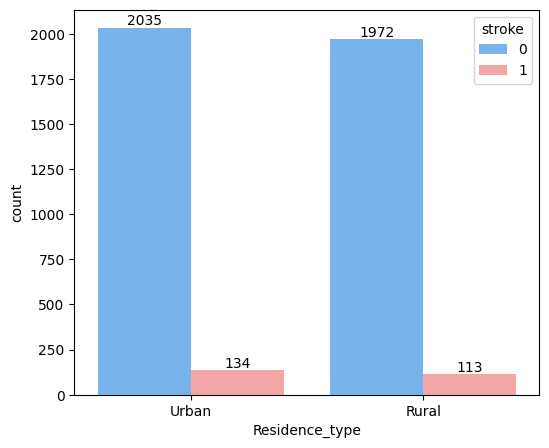

In [22]:
#สร้างกราฟแท่ง (bar plot) เพื่อแสดงจำนวนผู้ป่วยตามประเภทที่อยู่อาศัย (Residence type) โดยแบ่งกลุ่มตามสถานะการมีโรคหลอดเลือดสมอง
plt.figure(figsize=(6,5))
ax = sns.countplot(df, x='Residence_type', hue='stroke', hue_order=['0','1'], palette=['#66B3FF','#FF9999'])
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('bar plot_Residence type.png')
plt.show()

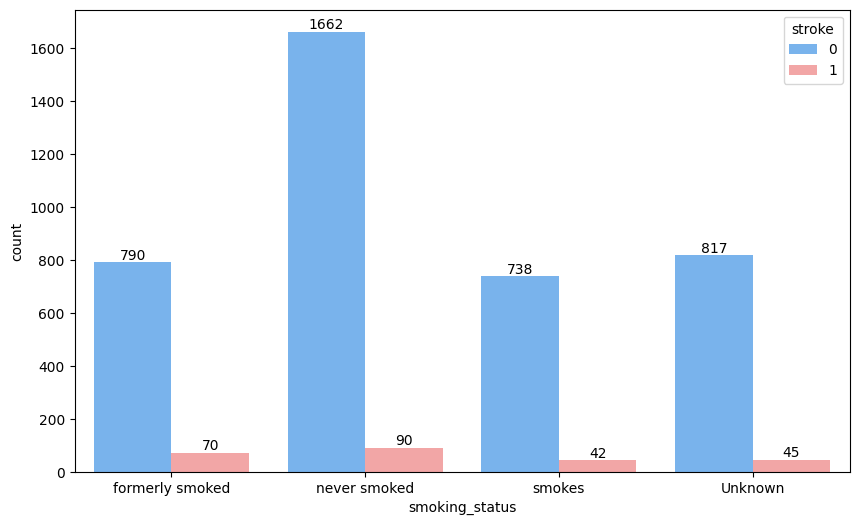

In [26]:
#สร้างกราฟแท่ง (bar plot) เพื่อแสดงจำนวนผู้ป่วยตามสถานะการสูบบุหรี่ (smoking status) โดยแบ่งกลุ่มตามสถานะการมีโรคหลอดเลือดสมอง
plt.figure(figsize=(10,6))
ax = sns.countplot(df, x='smoking_status', hue='stroke', hue_order=['0','1'], palette=['#66B3FF','#FF9999'])
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('bar plot_smoking_status.png')
plt.show()

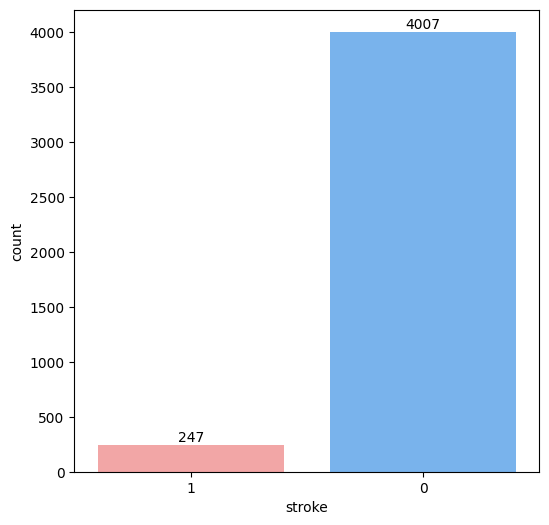

In [33]:
#สร้างกราฟแท่ง (bar plot) เพื่อแสดงจำนวนผู้ป่วยที่มีและไม่มีอาการโรคหลอดเลือดสมอง
plt.figure(figsize=(6,6))
ax = sns.countplot(df, x="stroke" ,palette=['#FF9999','#66B3FF'])
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('bar plot_stroke.png')
plt.show()

## 3. Data Preparation

### - Drop Columns

In [34]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [35]:
#ลบคอลัมน์ id ออกจาก DataFrame(df)
df=df.drop('id',axis=1) #axis=1 คือการลบคอลัมน์, axis=0 คือการลบแถว
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### - Drop missing values

In [36]:
#ลบแถวที่มีค่า NaN (ค่าข้อมูลที่ขาดหายไปหรือค่าว่าง) ออกจาก DataFrame(df)
#ทำการ drop ทุก rows ที่มีค่าเป็น null อยู่ใน columns ใดก็ตามใน rows นั้น
df.dropna(inplace=True) #inplace=True คือ ทำให้ DataFrame(df) อันใหม่หลังการ drop แล้วแทนที่อันเดิมทันที
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5103,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### - Encoding Categorical Data

In [37]:
#LabelEncoder ใช้สำหรับแปลงค่าข้อมูลประเภทหมวดหมู่(categorical data)ให้เป็นค่าตัวเลข (เช่น เปลี่ยน "ชาย" เป็น 0 และ "หญิง" เป็น 1)
from sklearn.preprocessing import LabelEncoder #นำเข้า function LabelEncoder
label_gender=LabelEncoder() #สร้างอ็อบเจกต์ label_gender ขึ้นมาเพื่อใช้สำหรับเข้ารหัสข้อมูลเพศ
label_married=LabelEncoder() #สร้างอ็อบเจกต์ label_married ขึ้นมาเพื่อใช้สำหรับเข้ารหัสข้อมูลสถานภาพสมรส
label_work=LabelEncoder() #สร้างอ็อบเจกต์ label_work ขึ้นมาเพื่อใช้สำหรับเข้ารหัสข้อมูลประเภทการทำงาน
label_residence=LabelEncoder() #สร้างอ็อบเจกต์ label_residence ขึ้นมาเพื่อใช้สำหรับเข้ารหัสข้อมูลที่อยู่อาศัย
label_smoking=LabelEncoder() #สร้างอ็อบเจกต์ label_smoking ขึ้นมาเพื่อใช้สำหรับเข้ารหัสข้อมูลการสูบบุหรี่

In [38]:
df['gender']=label_gender.fit_transform(df['gender']) #แปลงค่าของคอลัมน์ gender (เช่น 'Male', 'Female') เป็นค่าตัวเลข (0, 1) 
df['ever_married']=label_married.fit_transform(df['ever_married']) #แปลงค่าของคอลัมน์ ever_married (เช่น 'Yes', 'No') เป็นค่าตัวเลข (0, 1)
df['work_type']=label_work.fit_transform(df['work_type']) #แปลงค่าของคอลัมน์ work_type (เช่น 'Private', 'Self-employed', 'Govt_job', 'children') เป็นค่าตัวเลข (0,1,2,3)
df['Residence_type']=label_residence.fit_transform(df['Residence_type']) #แปลงค่าของคอลัมน์ Residence_type (เช่น 'Urban', 'Rural') เป็นค่าตัวเลข (0, 1)
df['smoking_status']=label_smoking.fit_transform(df['smoking_status']) #แปลงค่าของคอลัมน์ smoking_status (เช่น 'never smoked', 'smokes', 'formerly smoked') เป็นค่าตัวเลข (0,1,2)

In [39]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5103,0,18.0,0,0,0,2,1,82.85,46.9,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


### - OverSampling the Data with SMOTE

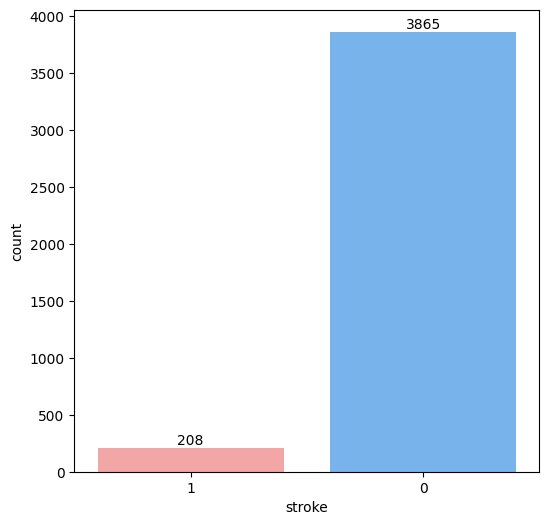

In [40]:
#สร้างกราฟแท่ง (bar plot) ก่อนการปรับสมดุลข้อมูล เพื่อแสดงจำนวนผู้ป่วยที่มีและไม่มีอาการโรคหลอดเลือดสมอง 
plt.figure(figsize=(6,6))
ax = sns.countplot(df, x="stroke",palette=['#FF9999','#66B3FF'])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [41]:
#กำหนดตัวแปร X และ y ซึ่งเป็นตัวแปรที่จะเราจะใช้ในการศึกษา
X=df[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y=df['stroke']

In [42]:
# นำเข้า SMOTE จากไลบรารี imblearn
from imblearn.over_sampling import SMOTE

#สร้างอ็อบเจกต์ smote ขึ้นมาเพื่อใช้สำหรับการปรับสมดุลข้อมูล
smote  = SMOTE() 

#ใช้ฟังก์ชัน fit_resample เพื่อปรับสมดุลของข้อมูล แล้วบันทึกผลลงในตัวแปร X_resample และ y_resample
X_resample, y_resample = smote .fit_resample(X, y)

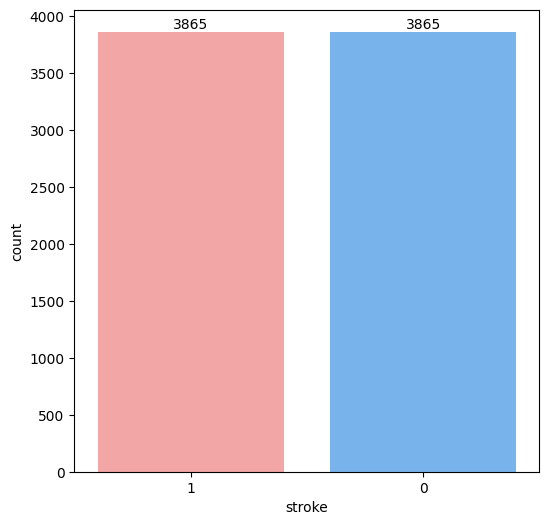

In [43]:
#สร้างกราฟแท่ง (bar plot) หลังการปรับสมดุลข้อมูล เพื่อแสดงจำนวนผู้ป่วยที่มีและไม่มีอาการโรคหลอดเลือดสมอง 
plt.figure(figsize=(6,6))
ax = sns.countplot(x = y_resample ,palette=['#FF9999','#66B3FF'])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [44]:
#ตรวจสอบกลุ่มข้อมูลก่อนและหลังการใช้ SMOTE
print("Original set distribution: \n", y.value_counts())
print("\nResampled set distribution: \n", pd.Series(y_resample).value_counts())

Original set distribution: 
 stroke
0    3865
1     208
Name: count, dtype: int64

Resampled set distribution: 
 stroke
1    3865
0    3865
Name: count, dtype: int64


In [45]:
X_resample

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1
1,1,80.000000,0,1,1,2,0,105.920000,32.500000,2
2,0,49.000000,0,0,1,2,1,171.230000,34.400000,3
3,0,79.000000,1,0,1,3,0,174.120000,24.000000,2
4,1,81.000000,0,0,1,2,1,186.210000,29.000000,1
...,...,...,...,...,...,...,...,...,...,...
7725,0,71.795442,1,0,0,2,0,187.986852,36.500000,2
7726,1,59.795035,0,0,1,2,0,199.842854,35.939131,1
7727,0,74.938308,0,0,1,2,1,224.690530,28.572822,2
7728,0,59.679874,0,0,1,1,0,118.856047,35.941918,3


### - Data Split 70:30 

In [46]:
#แบ่งชุดข้อมูลที่ถูกปรับสมดุลแล้วออกเป็นชุดฝึก (training set) และชุดทดสอบ (testing set) เพื่อใช้ในการฝึกและประเมินโมเดล
#นำเข้า train_test_split จากไลบรารี sklearn.model_selection ซึ่งเป็นฟังก์ชันที่ใช้สำหรับแบ่งชุดข้อมูลออกเป็นชุดฝึกและชุดทดสอบ
from sklearn.model_selection import train_test_split

#test_size=0.3 เป็นการกำหนดสัดส่วนของชุดทดสอบเป็น 30% ของข้อมูลทั้งหมด (ชุดฝึกจะมี 70%)
#random_state=1 ทำให้การสุ่มแต่ละครั้งได้ผลลัพธ์เหมือนกันในแต่ละครั้งที่รัน
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size=0.3,random_state=1)

In [47]:
#ตรวจสอบขนาดของข้อมูล
print("X_train:", X_train.shape)
print("X_test:",X_test.shape)
print("y_train: ",y_train.value_counts())
print("y_test: ",y_test.value_counts())

X_train: (5411, 10)
X_test: (2319, 10)
y_train:  stroke
1    2710
0    2701
Name: count, dtype: int64
y_test:  stroke
0    1164
1    1155
Name: count, dtype: int64


### - Feature Selection

In [48]:
#เลือกคุณลักษณะที่สำคัญที่สุดในชุดข้อมูลด้วยวิธี Recursive Feature Elimination (RFE) โดยใช้โมเดล Gradient Boosting Classifier

#นำเข้า GradientBoostingClassifier จากไลบรารี sklearn
from sklearn.ensemble import GradientBoostingClassifier

#นำเข้า RFE ซึ่งเป็นวิธีการเลือกคุณลักษณะที่ช่วยลดจำนวนคุณลักษณะโดยการเลือกเฉพาะคุณลักษณะที่สำคัญที่สุด
from sklearn.feature_selection import RFE

#กำหนดโมเดลที่จะนำไปใช้ในการทำ RFE
estimator = GradientBoostingClassifier(n_estimators=100)

# n_features_to_select=5 เป็นการระบุให้เลือกคุณลักษณะจำนวน 5 ตัว 
# step=1 เป็นการกำหนดให้ลบคุณลักษณะทีละ 1 ตัว 
selector = RFE(estimator,n_features_to_select=5,step=1)
selector = selector.fit(X_train,y_train)

In [51]:
cols=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']

In [49]:
#ช่วยบอกว่าคุณลักษณะใดถูกเลือก (True = ถูกเลือก, False = ไม่ถูกเลือก)
selector.support_ 

array([False,  True, False, False, False,  True,  True,  True,  True,
       False])

In [50]:
# ให้อับดับความสำคัญของคุณลักษณะ คุณลักษณะที่ถูกเลือกจะมีอันดับเป็น 1 ในขณะที่คุณลักษณะที่ไม่ได้ถูกเลือกจะมีอันดับสูงกว่า 1
selector.ranking_ 

array([2, 1, 5, 6, 3, 1, 1, 1, 1, 4])

In [52]:
#แสดงชื่อคุณลักษณะที่ถูกเลือก(คอลัมน์)
selector_cols = np.array(cols)[selector.support_]
selector_cols

array(['age', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi'],
      dtype='<U17')

In [53]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
557,1,56.000000,0,0,1,2,0,81.180000,26.900000,2
4699,1,77.246908,0,0,1,2,0,262.408329,31.562345,3
1255,0,51.000000,0,0,1,2,0,216.920000,31.200000,0
3789,0,54.000000,0,0,1,0,1,231.540000,29.900000,2
6996,1,61.525421,0,1,1,2,1,113.409061,36.638140,2
...,...,...,...,...,...,...,...,...,...,...
905,0,45.000000,0,0,0,2,0,153.760000,36.700000,0
5192,0,78.868153,0,0,1,2,0,76.671341,23.162070,1
3980,0,59.000000,0,0,1,2,1,182.520000,30.100000,0
235,1,27.000000,0,0,1,3,1,82.900000,25.000000,0


In [57]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1155,1,76.000000,1,0,1,2,0,80.150000,34.900000,1
1882,1,73.000000,0,0,0,0,0,79.590000,31.400000,3
2355,0,50.000000,0,0,1,2,0,114.050000,32.500000,2
1683,0,24.000000,1,0,0,2,1,107.220000,35.300000,3
587,0,49.000000,0,0,1,2,1,63.710000,33.800000,3
...,...,...,...,...,...,...,...,...,...,...
4685,0,79.172578,0,1,1,1,1,214.196423,28.182742,1
2233,0,50.000000,0,0,1,2,0,82.100000,26.400000,0
6009,0,80.096787,0,1,1,1,1,214.766352,28.090321,1
280,0,52.000000,0,0,1,2,1,82.240000,54.700000,1


In [54]:
#สร้าง DataFrame ใหม่ที่ประกอบด้วยเฉพาะคุณลักษณะที่ถูกเลือกจากกระบวนการ Recursive Feature Elimination (RFE) สำหรับชุดข้อมูลฝึก (training set) และชุดข้อมูลทดสอบ (testing set)

#selector.transform(X_train) ใช้เพื่อเลือกเฉพาะคุณลักษณะที่ถูกเลือกจากชุดข้อมูลการฝึก(X_train) โดย RFE จะตัดข้อมูลที่ไม่ถูกเลือกออก
#np.array(cols)[selector.support_] ใช้เพื่อดึงชื่อของคุณลักษณะที่ถูกเลือกจากอาร์เรย์ cols โดยอิงจาก selector.support_
X_train_selector = pd.DataFrame(selector.transform(X_train), columns=np.array(cols)[selector.support_])

#selector.transform(X_train) ใช้เพื่อเลือกเฉพาะคุณลักษณะที่ถูกเลือกจากชุดข้อมูลการฝึก(X_train) โดย RFE จะตัดข้อมูลที่ไม่ถูกเลือกออก
#np.array(cols)[selector.support_] ใช้เพื่อดึงชื่อของคุณลักษณะที่ถูกเลือกจากอาร์เรย์ cols โดยอิงจาก selector.support_
X_test_selector = pd.DataFrame(selector.transform(X_test), columns=np.array(cols)[selector.support_])

In [55]:
#ใช้ head() เพื่อแสดงข้อมูล X_train_selector 5แถวแรก
X_train_selector.head()

,age,work_type,Residence_type,avg_glucose_level,bmi
0,56.000000,2.0,0.0,81.180000,26.900000
1,77.246908,2.0,0.0,262.408329,31.562345
2,51.000000,2.0,0.0,216.920000,31.200000
3,54.000000,0.0,1.0,231.540000,29.900000
4,61.525421,2.0,1.0,113.409061,36.638140


In [56]:
#ใช้ head() เพื่อแสดงข้อมูล X_test_selector 5แถวแรก
X_test_selector.head()

,age,work_type,Residence_type,avg_glucose_level,bmi
0,76.0,2.0,0.0,80.15,34.9
1,73.0,0.0,0.0,79.59,31.4
2,50.0,2.0,0.0,114.05,32.5
3,24.0,2.0,1.0,107.22,35.3
4,49.0,2.0,1.0,63.71,33.8


### - Data Scaling (Standardisation)

In [58]:
#ใช้สำหรับการปรับขนาดข้อมูล (feature scaling) ของคุณลักษณะที่สำคัญในชุดข้อมูล

#นำเข้า StandardScaler จากไลบรารี sklearn ซึ่งเป็นเครื่องมือที่ใช้สำหรับปรับขนาดข้อมูลให้มีค่าเฉลี่ยเป็น 0 และส่วนเบี่ยงเบนมาตรฐานเป็น 1
from sklearn.preprocessing import StandardScaler

#สร้างอ็อบเจกต์ scaler ขึ้นมาเพื่อใช้สำหรับการปรับขนาดข้อมูล
scaler  = StandardScaler()

#ใช้ fit_transform เพื่อปรับขนาดข้อมูลในชุดการฝึก(X_train_selector) โดยคำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานจากชุดข้อมูลนี้
#ใช้ transform เพื่อปรับขนาดข้อมูลในชุดการทดสอบ(X_test_selector) โดยคำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานจากชุดข้อมูลนี้

X_train_selector.age = scaler .fit_transform(X_train_selector.age.values.reshape(-1,1))
X_test_selector.age = scaler .transform(X_test_selector.age.values.reshape(-1,1))

X_train_selector.bmi = scaler .fit_transform(X_train_selector.bmi.values.reshape(-1,1))
X_test_selector.bmi = scaler .transform(X_test_selector.bmi.values.reshape(-1,1))

X_train_selector.avg_glucose_level = scaler .fit_transform(X_train_selector.avg_glucose_level.values.reshape(-1,1))
X_test_selector.avg_glucose_level = scaler .transform(X_test_selector.avg_glucose_level.values.reshape(-1,1))

In [59]:
#ใช้ head() เพื่อแแสดงข้อมูล X_train_selector 5แถวแรก หลังการปรับขนาดข้อมูล
X_train_selector.head()

,age,work_type,Residence_type,avg_glucose_level,bmi
0,-0.137793,2.0,0.0,-0.708155,-0.535052
1,1.066721,2.0,0.0,2.501091,0.194137
2,-0.421250,2.0,0.0,1.695570,0.137467
3,-0.251176,0.0,1.0,1.954466,-0.065853
4,0.175450,2.0,1.0,-0.137433,0.987989


In [60]:
#ใช้ head() เพื่อแสดงข้อมูล X_test_selector 5แถวแรก หลังการปรับขนาดข้อมูล
X_test_selector.head()

,age,work_type,Residence_type,avg_glucose_level,bmi
0,0.996033,2.0,0.0,-0.726394,0.716145
1,0.825959,0.0,0.0,-0.736311,0.168747
2,-0.477941,2.0,0.0,-0.126083,0.340786
3,-1.951915,2.0,1.0,-0.247031,0.778705
4,-0.534632,2.0,1.0,-1.017519,0.544106


<Axes: >

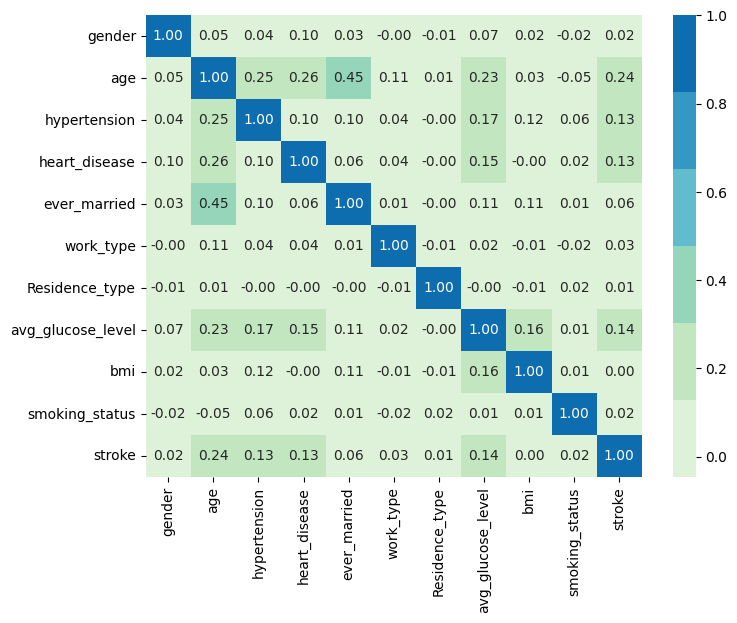

In [95]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette(palette='GnBu'),fmt='.2f')
# sns.heatmap(df.corr(),annot=True,cmap=sns.diverging_palette(220, 10, as_cmap=True),fmt='.2f')

## 4. Training Models & Evaluating 

### 4.1 RandomForestClassifier

In [62]:
#นำเข้า RandomForestClassifier จากไลบารี sklearn
from sklearn.ensemble import RandomForestClassifier

#สร้างอ็อบเจ็กต์ model_RF เพื่อใช้งานโมเดล RandomForestClassifier
model_RF = RandomForestClassifier()

#ใช้เมธอด fit เพื่อฝึกโมเดลด้วยข้อมูลฝึก (X_train_selector เป็น Feature และ y_train เป็นคลาสที่ต้องการจำแนกหรือ target)
model_RF.fit(X_train_selector,y_train)

RandomForestClassifier()

###  Test Model

In [63]:
#ใช้โมเดล model_RF ที่ฝึกมาทำการทำนายผลของข้อมูลทดสอบ (X_test_selector) และเก็บผลลัพธ์ไว้ในตัวแปร y_pred_RF
y_pred_RF = model_RF.predict(X_test_selector)
#print(y_pred_rf_sm)

In [ ]:
#นำเข้าโมดูล metrics จากไลบรารี scikit-learn เพื่อใช้งานฟังก์ชัน confusion_matrix , ConfusionMatrixDisplay , classification_report
from sklearn import metrics

<Figure size 500x500 with 0 Axes>

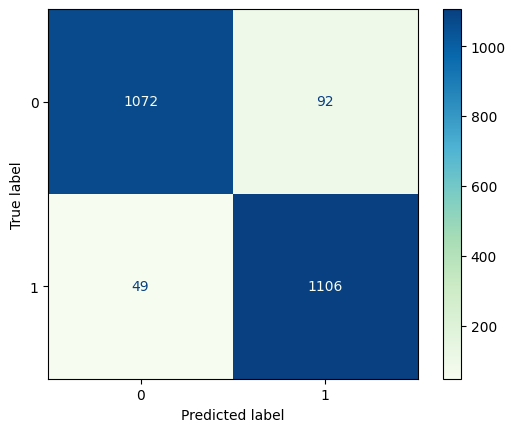

In [99]:
#การประเมินผลลัพธ์ของโมเดลโดยใช้เมทริกซ์ความสับสน (ConfusionMatrix)

#เรียกใช้งานฟังก์ชัน confusion_matrix เพื่อคำนวณเมทริกซ์ความสับสน โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่ทำนาย (y_pred_RF)
confusion_matrix_RF = metrics.confusion_matrix(y_test, y_pred_RF)

#ใช้ ConfusionMatrixDisplay เพื่อสร้างและแสดงกราฟของเมทริกซ์ความสับสน
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_RF)

#บันทึกผล ConfusionMatrix เป็นรูปภาพ
plt.figure(figsize=(5,5))
cm_display.plot(cmap=plt.cm.GnBu)
plt.savefig('ConfusionMatrix_RandomForest.png')

#โชว์ผล ConfusionMatrix
plt.show()

In [156]:
# from sklearn.metrics import  classification_report
#ใช้ฟังก์ชัน classification_report เพื่อคำนวณและเก็บรายงานความแม่นยำของโมเดล โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่คาดการณ์ (y_pred_RF)
report_RF = metrics.classification_report(y_test,y_pred_RF)
print('Random Forest Classifier Model')
print(report_RF)

Random Forest Classifier Model
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1164
           1       0.92      0.96      0.94      1155

    accuracy                           0.94      2319
   macro avg       0.94      0.94      0.94      2319
weighted avg       0.94      0.94      0.94      2319



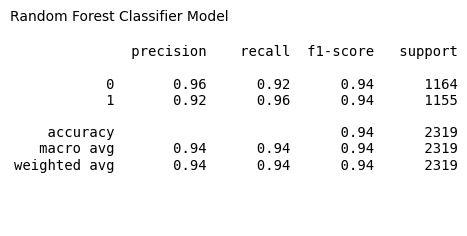

In [171]:
#บึนทึกผลลัพธ์ classification_report เป็นรูปภาพ
plt.figure(figsize=(5,0.5))
plt.title('Random Forest Classifier Model', pad=120, fontsize=10, loc='left')
plt.text(0.01, 1.05, report_RF, {'fontsize': 10}, fontproperties='monospace')
plt.axis('off')  # ปิดแกนกราฟ
# plt.savefig('Classification Report_Random Forest.png', bbox_inches='tight', dpi=300)

## DecisionTreeClassifier

In [159]:
#นำเข้า DecisionTreeClassifier จากไลบารี sklearn
from sklearn.tree import DecisionTreeClassifier

#สร้างอ็อบเจ็กต์ model_DT เพื่อใช้งานโมเดล DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

#ใช้เมธอด fit เพื่อฝึกโมเดลด้วยข้อมูลฝึก (X_train_selector เป็น Feature และ y_train เป็นคลาสที่ต้องการจำแนกหรือ target)
model_DT.fit(X_train_selector,y_train)

DecisionTreeClassifier()

## Test Model

In [160]:
#ใช้โมเดล model_DT ที่ฝึกมาทำการทำนายผลของข้อมูลทดสอบ (X_test_selector) และเก็บผลลัพธ์ไว้ในตัวแปร y_pred_DT
y_pred_DT = model_DT.predict(X_test_selector)

<Figure size 500x500 with 0 Axes>

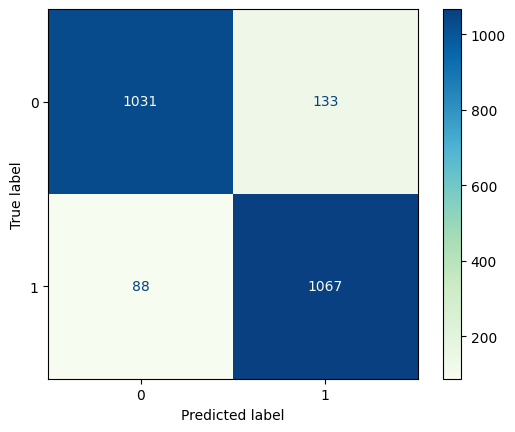

In [162]:
#การประเมินผลลัพธ์ของโมเดลโดยใช้เมทริกซ์ความสับสน (ConfusionMatrix)

#เรียกใช้งานฟังก์ชัน confusion_matrix เพื่อคำนวณเมทริกซ์ความสับสน โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่ทำนาย (y_pred_RF)
confusion_matrix_dt_sm = metrics.confusion_matrix(y_test, y_pred_DT)

#ใช้ ConfusionMatrixDisplay เพื่อสร้างและแสดงกราฟของเมทริกซ์ความสับสน
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt_sm)

#บันทึกผล ConfusionMatrix เป็นรูปภาพ
plt.figure(figsize=(5,5))
cm_display.plot(cmap=plt.cm.GnBu)
plt.savefig('ConfusionMatrix_DecisionTree.png')

#โชว์ผล ConfusionMatrix
plt.show()

In [165]:
#ใช้ฟังก์ชัน classification_report เพื่อคำนวณและเก็บรายงานความแม่นยำของโมเดล โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่คาดการณ์ (y_pred_RF)
report_DT = metrics.classification_report(y_test,y_pred_DT)
print('Decision Tree Classifier Model')
print(report_DT)

Decision Tree Classifier Model
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1164
           1       0.89      0.92      0.91      1155

    accuracy                           0.90      2319
   macro avg       0.91      0.90      0.90      2319
weighted avg       0.91      0.90      0.90      2319



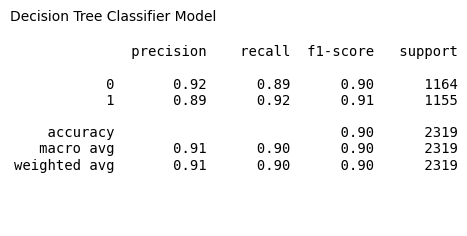

In [170]:
#บึนทึกผลลัพธ์ classification_report เป็นรูปภาพ
plt.figure(figsize=(5,0.5))
plt.title('Decision Tree Classifier Model', pad=120, fontsize=10, loc='left')
plt.text(0.01, 1.05, report_DT, {'fontsize': 10}, fontproperties='monospace')
plt.axis('off')  # ปิดแกนกราฟ
# plt.savefig('Classification Report_Decision Tree.png', bbox_inches='tight', dpi=300)

## KNeighborsClassifier

In [172]:
#นำเข้า KNeighborsClassifier จากไลบารี sklearn
from sklearn.neighbors import KNeighborsClassifier

#สร้างอ็อบเจ็กต์ model_KNN เพื่อใช้งานโมเดล KNeighborsClassifier
model_KNN = KNeighborsClassifier()

#ใช้เมธอด fit เพื่อฝึกโมเดลด้วยข้อมูลฝึก (X_train_selector เป็น Feature และ y_train เป็นคลาสที่ต้องการจำแนกหรือ target)
model_KNN.fit(X_train_selector,y_train)

KNeighborsClassifier()

In [173]:
#ใช้โมเดล model_KNN ที่ฝึกมาทำการทำนายผลของข้อมูลทดสอบ (X_test_selector) และเก็บผลลัพธ์ไว้ในตัวแปร y_pred_DT
y_pred_KNN = model_KNN.predict(X_test_selector)

## Test Model

<Figure size 500x500 with 0 Axes>

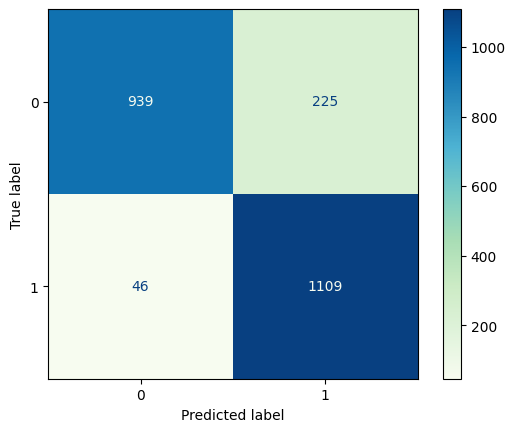

In [174]:
#การประเมินผลลัพธ์ของโมเดลโดยใช้เมทริกซ์ความสับสน (ConfusionMatrix)

#เรียกใช้งานฟังก์ชัน confusion_matrix เพื่อคำนวณเมทริกซ์ความสับสน โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่ทำนาย (y_pred_RF)
confusion_matrix_KNN = metrics.confusion_matrix(y_test, y_pred_KNN)

#ใช้ ConfusionMatrixDisplay เพื่อสร้างและแสดงกราฟของเมทริกซ์ความสับสน
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_KNN)

#บันทึกผล ConfusionMatrix เป็นรูปภาพ
plt.figure(figsize=(5,5))
cm_display.plot(cmap=plt.cm.GnBu)
plt.savefig('ConfusionMatrix_K-nearest Neighbors.png')

#โชว์ผล ConfusionMatrix
plt.show()

In [175]:
#ใช้ฟังก์ชัน classification_report เพื่อคำนวณและเก็บรายงานความแม่นยำของโมเดล โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่คาดการณ์ (y_pred_RF)
report_KNN = metrics.classification_report(y_test,y_pred_KNN)
print('K-nearest Neighbors Classifier Model')
print(report_DT)

K-nearest Neighbors Classifier Model
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1164
           1       0.89      0.92      0.91      1155

    accuracy                           0.90      2319
   macro avg       0.91      0.90      0.90      2319
weighted avg       0.91      0.90      0.90      2319



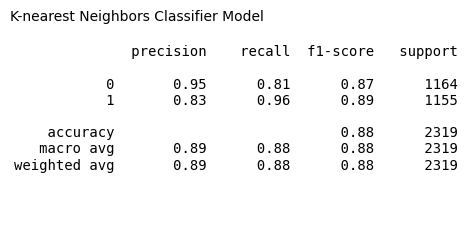

In [177]:
#บันทึกผลลัพธ์ classification_report เป็นรูปภาพ
plt.figure(figsize=(5,0.5))
plt.title('K-nearest Neighbors Classifier Model', pad=120, fontsize=10, loc='left')
plt.text(0.01, 1.05, report_KNN, {'fontsize': 10}, fontproperties='monospace')
plt.axis('off')  # ปิดแกนกราฟ
# plt.savefig('Classification Report_K-nearest Neighbors.png', bbox_inches='tight', dpi=300)

## Compare accuracy results

In [178]:
#แสดงค่า Accuracy เป็นรูปแบบเปอร์เซ็นต์

score_rf=round(metrics.accuracy_score(y_test,y_pred_RF)*100,2)
score_dt=round(metrics.accuracy_score(y_test,y_pred_DT)*100,2)
score_knn=round(metrics.accuracy_score(y_test,y_pred_KNN)*100,2)

print(f"The Accuracy score achieved using RandomForest is: {score_rf} % \n")
print(f"The Accuracy score achieved using DecisionTree is: {score_dt} % \n") 
print(f"The Accuracy score achieved using KNeighbors is: {score_knn} %")

The Accuracy score achieved using RandomForest is: 93.92 % 

The Accuracy score achieved using DecisionTree is: 90.47 % 

The Accuracy score achieved using KNeighbors is: 88.31 %


## Hyperparameter Tuning

### - Hyperparameter Tuning: RandomForestClassifier

In [179]:
#นำเข้า  GridSearchCV จากไลบารี sklearn
from sklearn.model_selection import GridSearchCV

In [180]:
#กำหนดเซตพารามิเตอร์ที่จะทดสอบในการทำ Grid Search
# n_estimators คือ  จำนวนต้นไม้ในป่า
# max_depth คือ ความลึกสูงสุดของต้นไม้แต่ละต้น
# max_features คือ ฟีเจอร์ที่จะใช้ในการแบ่งต้นไม้ 

param_grid_RF = [{'n_estimators':[100,200,300,400,500],
                'max_depth':[5,10,15,20],
                'max_features':['sqrt','log2'] }]

In [181]:
#หาพารามิเตอร์ที่เหมาะสมที่สุดสำหรับโมเดล Random Forest โดยใช้ Grid Search และ Cross-Validation!

#สร้างอ็อบเจ็กต์ grid_search_RF เพื่อใช้งานโมเดล GridSearchCV โดยกำหนดค่าต่างๆ ดังนี้
# estimator = RandomForestClassifier() ใช้โมเดล RandomForestClassifier หาพารามิเตอร์ที่เหมาะสมที่สุด
# param_grid = param_grid_RF ใช้ เซตพารามิเตอร์ param_grid_RF ในการทดสอบ
# cv = 5 การทำ Cross-Validation จำนวน 5 รอบ
# n_jobs = -1 ใช้ CPU ทั้งหมดในการประมวลผล
# verbose = True ให้มีการแสดงข้อมูลรายละเอียดระหว่างการประมวลผล
# return_train_score = True ให้มีการคืนค่าคะแนนการฝึกด้วย
# scoring = accuracy ใช้คะแนน accuracy เป็นตัววัดประสิทธิภาพ

grid_search_RF = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_RF,
                              cv=5, n_jobs=-1, verbose=True, return_train_score=True, scoring='accuracy')

# ใช้ฟังก์ชัน fit เพื่อฝึกโมเดลด้วยข้อมูลฝึก (X_train_selector และ y_train) โดยจะเป็นการค้นหาพารามิเตอร์ที่ดีที่สุด
grid_search_RF.fit(X_train_selector,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [5, 10, 15, 20],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100, 200, 300, 400, 500]}],
             return_train_score=True, scoring='accuracy', verbose=True)

In [182]:
# แสดงผลพารามิเตอร์ที่ดีที่สุดและคะแนนที่ดีที่สุดจากการค้นหาพารามิเตอร์ ด้วย GridSearchCV
print(f'Best hyperparameters is: {grid_search_RF.best_params_}')
print(f'Best accuracy score is: {grid_search_RF.best_score_}')

Best hyperparameters is: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 300}
Best accuracy score is: 0.9166469535059557


In [183]:
# สร้างและจัดเรียงข้อมูลผลลัพธ์จากการค้นหาพารามิเตอร์เพื่อให้ดูง่ายขึ้น
pd.DataFrame(grid_search_RF.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
37,6.356414,0.230280,0.161013,0.004948,20,log2,300,"{'max_depth': 20, 'max_features': 'log2', 'n_e...",0.939982,0.918669,...,0.916647,0.014233,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
35,2.124157,0.168163,0.079170,0.023293,20,log2,100,"{'max_depth': 20, 'max_features': 'log2', 'n_e...",0.937211,0.914972,...,0.916463,0.012205,2,1.000000,1.000000,1.000000,1.000000,0.999769,0.999954,0.000092
39,9.192661,0.323760,0.214039,0.022188,20,log2,500,"{'max_depth': 20, 'max_features': 'log2', 'n_e...",0.937211,0.916821,...,0.915723,0.013289,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
34,10.931674,0.053115,0.282176,0.036646,20,sqrt,500,"{'max_depth': 20, 'max_features': 'sqrt', 'n_e...",0.940905,0.915896,...,0.915723,0.014891,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
31,4.606875,0.144089,0.132828,0.015754,20,sqrt,200,"{'max_depth': 20, 'max_features': 'sqrt', 'n_e...",0.938135,0.913124,...,0.915169,0.012792,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
33,8.400637,0.192157,0.267915,0.048333,20,sqrt,400,"{'max_depth': 20, 'max_features': 'sqrt', 'n_e...",0.933518,0.918669,...,0.914985,0.011884,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
32,6.376181,0.223817,0.159758,0.008913,20,sqrt,300,"{'max_depth': 20, 'max_features': 'sqrt', 'n_e...",0.938135,0.913124,...,0.914984,0.012893,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
38,8.144014,0.155050,0.190412,0.008400,20,log2,400,"{'max_depth': 20, 'max_features': 'log2', 'n_e...",0.939058,0.915896,...,0.914799,0.014138,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
30,2.122390,0.142809,0.072690,0.007312,20,sqrt,100,"{'max_depth': 20, 'max_features': 'sqrt', 'n_e...",0.935365,0.920518,...,0.914430,0.013162,9,1.000000,1.000000,0.999769,1.000000,1.000000,0.999954,0.000092
36,4.252420,0.132144,0.115485,0.016531,20,log2,200,"{'max_depth': 20, 'max_features': 'log2', 'n_e...",0.937211,0.917745,...,0.914429,0.013834,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


### - Hyperparameter Tuning : DecisionTreeClassifier

In [192]:
#กำหนดเซตพารามิเตอร์ที่จะทดสอบในการทำ Grid Search
# criterion คือ  เกณฑ์ในการแบ่งข้อมูล
# max_depth คือ ความลึกสูงสุดของต้นไม้
# min_samples_split คือ จำนวนตัวอย่างขั้นต่ำที่ต้องการในการแบ่งต้นไม้

param_grid_DT = [{'criterion':['gini', 'entropy', 'log_loss'],
                   'max_depth':[5,10,15,20,25,30],
                   'min_samples_split':[1,5,10,20] }]

In [193]:
#หาพารามิเตอร์ที่เหมาะสมที่สุดสำหรับโมเดล Decision Tree โดยใช้ Grid Search และ Cross-Validation!

#สร้างอ็อบเจ็กต์ grid_search_DT เพื่อใช้งานโมเดล GridSearchCV โดยกำหนดค่าต่างๆ ดังนี้
# estimator = DecisionTreeClassifier() ใช้โมเดล DecisionTreeClassifier หาพารามิเตอร์ที่เหมาะสมที่สุด
# param_grid = param_grid_DT ใช้ เซตพารามิเตอร์ param_grid_DT ในการทดสอบ
# cv = 5 การทำ Cross-Validation จำนวน 5 รอบ
# n_jobs = -1 ใช้ CPU ทั้งหมดในการประมวลผล
# verbose = True ให้มีการแสดงข้อมูลรายละเอียดระหว่างการประมวลผล
# return_train_score = True ให้มีการคืนค่าคะแนนการฝึกด้วย
# scoring = accuracy ใช้คะแนน accuracy เป็นตัววัดประสิทธิภาพ

grid_search_DT = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid_DT,
                              cv=5,n_jobs=-1,verbose=True,return_train_score=True,scoring='accuracy')

# ใช้ฟังก์ชัน fit เพื่อฝึกโมเดลด้วยข้อมูลฝึก (X_train_selector และ y_train) โดยจะเป็นการค้นหาพารามิเตอร์ที่ดีที่สุด
grid_search_DT.fit(X_train_selector,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [5, 10, 15, 20, 25, 30],
                          'min_samples_split': [1, 5, 10, 20]}],
             return_train_score=True, scoring='accuracy', verbose=True)

In [194]:
# แสดงผลพารามิเตอร์ที่ดีที่สุดและคะแนนที่ดีที่สุดจากการค้นหาพารามิเตอร์ ด้วย GridSearchCV

print(f'Best hyperparameters is: {grid_search_DT.best_params_}')
print(f'Best accuracy score is: {grid_search_DT.best_score_}')

Best hyperparameters is: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5}
Best accuracy score is: 0.8734015698844347


In [195]:
# สร้างและจัดเรียงข้อมูลผลลัพธ์จากการค้นหาพารามิเตอร์เพื่อให้ดูง่ายขึ้น
pd.DataFrame(grid_search_DT.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
13,0.087168,0.035929,0.011968,0.002435,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.897507,0.881701,...,0.873402,0.015572,1,0.983364,0.985216,0.982444,0.979441,0.985216,0.983136,0.002137
21,0.111105,0.015543,0.016745,0.011094,gini,30,5,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.900277,0.878928,...,0.872847,0.015885,2,0.984057,0.986140,0.982906,0.979441,0.985678,0.983644,0.002398
65,0.093205,0.031220,0.012366,0.005051,log_loss,25,5,"{'criterion': 'log_loss', 'max_depth': 25, 'mi...",0.889197,0.888170,...,0.872479,0.016082,3,0.987061,0.986602,0.988450,0.983830,0.985678,0.986324,0.001535
69,0.079080,0.013834,0.008118,0.001248,log_loss,30,5,"{'criterion': 'log_loss', 'max_depth': 30, 'mi...",0.887350,0.888170,...,0.871740,0.016432,4,0.986830,0.988912,0.988912,0.983830,0.986371,0.986971,0.001886
41,0.073337,0.009926,0.009138,0.001065,entropy,25,5,"{'criterion': 'entropy', 'max_depth': 25, 'min...",0.889197,0.883549,...,0.871555,0.015945,5,0.986830,0.987064,0.988681,0.984985,0.985678,0.986648,0.001269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0.004198,0.003952,0.000000,0.000000,entropy,30,1,"{'criterion': 'entropy', 'max_depth': 30, 'min...",NaN,NaN,...,NaN,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,0.002018,0.000261,0.000000,0.000000,entropy,10,1,"{'criterion': 'entropy', 'max_depth': 10, 'min...",NaN,NaN,...,NaN,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0.002092,0.000426,0.000000,0.000000,entropy,25,1,"{'criterion': 'entropy', 'max_depth': 25, 'min...",NaN,NaN,...,NaN,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,0.002352,0.000470,0.000000,0.000000,gini,25,1,"{'criterion': 'gini', 'max_depth': 25, 'min_sa...",NaN,NaN,...,NaN,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# x = pd.DataFrame(model_rf.cv_results_).sort_values(by='rank_test_score')
# x.columns

### - Hyperparameter Tuning: KNeighborsClassifier

In [207]:
#กำหนดเซตพารามิเตอร์ที่จะทดสอบในการทำ Grid Search
# n_neighbors คือ  จำนวนเพื่อนบ้านที่ใช้ในการจำแนกประเภท
# weights คือ วิธีการคำนวณน้ำหนักของเพื่อนบ้าน
# metric คือ ระยะทางที่ใช้ในการคำนวณระยะห่างระหว่างจุด

param_grid_KNN =[ {'n_neighbors': np.arange(1, 31),  # ลองค่าจำนวนเพื่อนบ้านจาก 1 ถึง 30
                  'weights': ['uniform', 'distance'],  # ค่าหนัก (weights)
                  'metric': ['euclidean', 'manhattan'] }] # เมตริกที่ใช้ 

In [208]:
#หาพารามิเตอร์ที่เหมาะสมที่สุดสำหรับโมเดล Decision Tree โดยใช้ Grid Search และ Cross-Validation!

#สร้างอ็อบเจ็กต์ grid_search_KNN เพื่อใช้งานโมเดล GridSearchCV โดยกำหนดค่าต่างๆ ดังนี้
# estimator = KNeighborsClassifier() ใช้โมเดล KNeighborsClassifier หาพารามิเตอร์ที่เหมาะสมที่สุด
# param_grid = param_grid_KNN ใช้ เซตพารามิเตอร์ param_grid_DT ในการทดสอบ
# cv = 5 การทำ Cross-Validation จำนวน 5 รอบ
# n_jobs = -1 ใช้ CPU ทั้งหมดในการประมวลผล
# verbose = True ให้มีการแสดงข้อมูลรายละเอียดระหว่างการประมวลผล
# return_train_score = True ให้มีการคืนค่าคะแนนการฝึกด้วย
# scoring = accuracy ใช้คะแนน accuracy เป็นตัววัดประสิทธิภาพ

grid_search_KNN = GridSearchCV(estimator= KNeighborsClassifier(),param_grid=param_grid_KNN,
                              cv=5,n_jobs=-1,verbose=True,return_train_score=True,scoring='accuracy')

# ใช้ฟังก์ชัน fit เพื่อฝึกโมเดลด้วยข้อมูลฝึก (X_train_selector และ y_train) โดยจะเป็นการค้นหาพารามิเตอร์ที่ดีที่สุด
grid_search_KNN.fit(X_train_selector,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'metric': ['euclidean', 'manhattan'],
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=True)

In [211]:
# แสดงผลพารามิเตอร์ที่ดีที่สุดและคะแนนที่ดีที่สุดจากการค้นหาพารามิเตอร์ ด้วย GridSearchCV

print(f'Best hyperparameters is: {grid_search_KNN.best_params_}')
print(f'Best accuracy score is: {grid_search_KNN.best_score_}')

Best hyperparameters is: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best accuracy score is: 0.8913296228215251


In [210]:
# สร้างและจัดเรียงข้อมูลผลลัพธ์จากการค้นหาพารามิเตอร์เพื่อให้ดูง่ายขึ้น
pd.DataFrame(grid_search_KNN.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
61,0.021447,0.001450,0.016885,0.001548,manhattan,1,distance,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.906741,0.891867,...,0.891330,0.009766,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
60,0.074769,0.045499,0.174131,0.037063,manhattan,1,uniform,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.906741,0.891867,...,0.891330,0.009766,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
63,0.023387,0.005539,0.021806,0.002588,manhattan,2,distance,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.906741,0.891867,...,0.891330,0.009766,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
62,0.025402,0.003124,0.210793,0.031439,manhattan,2,uniform,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.906741,0.893715,...,0.888372,0.013909,4,0.974584,0.976207,0.974359,0.973435,0.973435,0.974404,0.001016
0,0.030137,0.004180,0.171724,0.012867,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.908587,0.885397,...,0.887448,0.011387,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.054495,0.019561,0.466850,0.175186,euclidean,28,uniform,"{'metric': 'euclidean', 'n_neighbors': 28, 'we...",0.836565,0.823475,...,0.818145,0.012895,116,0.823013,0.827212,0.833449,0.826981,0.829291,0.827989,0.003403
118,0.027305,0.006616,0.221129,0.013143,manhattan,30,uniform,"{'metric': 'manhattan', 'n_neighbors': 30, 'we...",0.839335,0.824399,...,0.818144,0.017281,117,0.823706,0.829522,0.834604,0.832294,0.833218,0.830669,0.003858
48,0.034759,0.002711,0.316544,0.045434,euclidean,25,uniform,"{'metric': 'euclidean', 'n_neighbors': 25, 'we...",0.838412,0.820702,...,0.817220,0.014497,118,0.821858,0.829060,0.833911,0.826981,0.831139,0.828590,0.004073
52,0.038151,0.015900,0.317046,0.036853,euclidean,27,uniform,"{'metric': 'euclidean', 'n_neighbors': 27, 'we...",0.834718,0.817930,...,0.816482,0.012370,119,0.820702,0.825826,0.832525,0.826057,0.830215,0.827065,0.004069


## Model with with the best hyperparameters

### - RandomForestClassifier

In [184]:
#ฝึกโมเดล Random Forest โดยใช้พารามิเตอร์ที่ดีที่สุด

# สร้างอ็อบเจ็กต์ model_best_RF ของ RandomForestClassifier โดยใช้พารามิเตอร์ที่ดีที่สุดที่ได้จากการค้นหาคือ 
# {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 300}
model_best_RF = RandomForestClassifier(max_depth=20,max_features='log2',n_estimators=300)

#ใช้ฟังก์ชัน fit เพื่อฝึกโมเดลด้วยข้อมูลฝึก (X_train_selector และ y_train)
model_best_RF.fit(X_train_selector,y_train)

RandomForestClassifier(max_depth=20, max_features='log2', n_estimators=300)

In [185]:
#ใช้โมเดล model_best_RF ที่ฝึกมาทำการทำนายผลของข้อมูลทดสอบ (X_test_selector) และเก็บผลลัพธ์ไว้ในตัวแปร y_pred_best_RF
y_pred_best_RF = model_best_RF.predict(X_test_selector)

<Figure size 500x500 with 0 Axes>

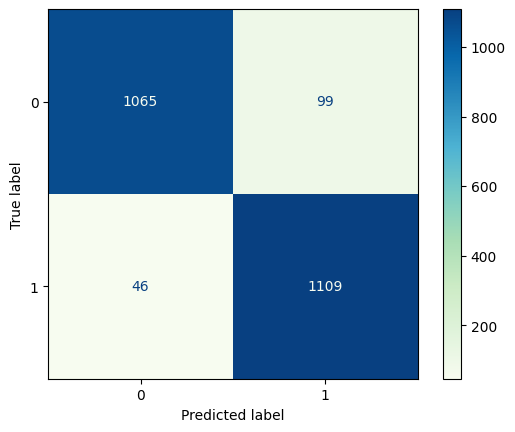

In [199]:
#การประเมินผลลัพธ์ของโมเดลโดยใช้เมทริกซ์ความสับสน (ConfusionMatrix)

#เรียกใช้งานฟังก์ชัน confusion_matrix เพื่อคำนวณเมทริกซ์ความสับสน โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่ทำนาย (y_pred_RF)
confusion_matrix_RF_best = metrics.confusion_matrix(y_test, y_pred_best_RF)

#ใช้ ConfusionMatrixDisplay เพื่อสร้างและแสดงกราฟของเมทริกซ์ความสับสน
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_RF_best)

#บันทึกผล ConfusionMatrix เป็นรูปภาพ
plt.figure(figsize=(5,5))
cm_display.plot(cmap=plt.cm.GnBu)
plt.savefig('ConfusionMatrix_Random Forest_hyperparameters.png')

#โชว์ผล ConfusionMatrix
plt.show()

In [201]:
#ใช้ฟังก์ชัน classification_report เพื่อคำนวณและเก็บรายงานความแม่นยำของโมเดล โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่คาดการณ์ (y_pred_RF)
report_RF_best = metrics.classification_report(y_test,y_pred_best_RF)
print('Random Forest Classifier Model with Hyperparameter Tuning ')
print(report_RF_best)

Random Forest Classifier Model with Hyperparameter Tuning 
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1164
           1       0.92      0.96      0.94      1155

    accuracy                           0.94      2319
   macro avg       0.94      0.94      0.94      2319
weighted avg       0.94      0.94      0.94      2319



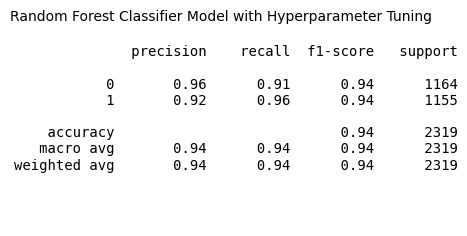

In [206]:
#บันทึกผลลัพธ์ classification_report เป็นรูปภาพ
plt.figure(figsize=(5,0.5))
plt.title('Random Forest Classifier Model with Hyperparameter Tuning ', pad=120, fontsize=10, loc='left')
plt.text(0.01, 1.05, report_RF_best, {'fontsize': 10}, fontproperties='monospace')
plt.axis('off')  # ปิดแกนกราฟ
# plt.savefig('Classification Report_Random Forest_hyperparameters.png', bbox_inches='tight', dpi=300)

### - DecisionTreeClassifier

In [197]:
#ฝึกโมเดล Decision Tree โดยใช้พารามิเตอร์ที่ดีที่สุด

# สร้างอ็อบเจ็กต์ model_best_RF ของ DecisionTreeClassifier โดยใช้พารามิเตอร์ที่ดีที่สุดที่ได้จากการค้นหาคือ 
# {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5}
model_best_DT = DecisionTreeClassifier(max_depth=20,min_samples_split=5,criterion='gini')

#ใช้ฟังก์ชัน fit เพื่อฝึกโมเดลด้วยข้อมูลฝึก (X_train_selector และ y_train)
model_best_DT.fit(X_train_selector,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=5)

In [198]:
#ใช้โมเดล model_best_DT ที่ฝึกมาทำการทำนายผลของข้อมูลทดสอบ (X_test_selector) และเก็บผลลัพธ์ไว้ในตัวแปร y_pred_best_DT
y_pred_best_DT = model_best_DT.predict(X_test_selector)

<Figure size 500x500 with 0 Axes>

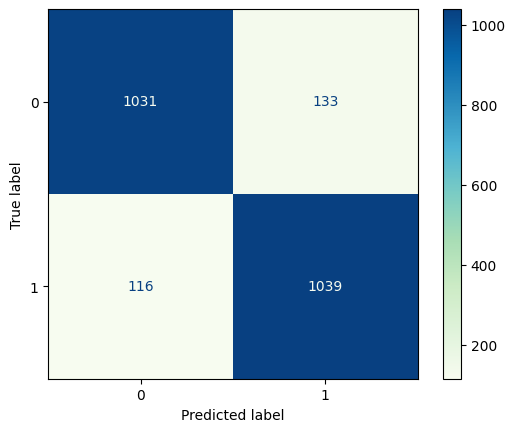

In [200]:
#การประเมินผลลัพธ์ของโมเดลโดยใช้เมทริกซ์ความสับสน (ConfusionMatrix)

#เรียกใช้งานฟังก์ชัน confusion_matrix เพื่อคำนวณเมทริกซ์ความสับสน โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่ทำนาย (y_pred_RF)
confusion_matrix_DT_best = metrics.confusion_matrix(y_test, y_pred_best_DT)

#ใช้ ConfusionMatrixDisplay เพื่อสร้างและแสดงกราฟของเมทริกซ์ความสับสน
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_DT_best)

#บันทึกผล ConfusionMatrix เป็นรูปภาพ
plt.figure(figsize=(5,5))
cm_display.plot(cmap=plt.cm.GnBu)
plt.savefig('ConfusionMatrix_Decision Tree_hyperparameters.png')

#โชว์ผล ConfusionMatrix
plt.show()

In [202]:
#ใช้ฟังก์ชัน classification_report เพื่อคำนวณและเก็บรายงานความแม่นยำของโมเดล โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่คาดการณ์ (y_pred_RF)
report_DT_best = metrics.classification_report(y_test,y_pred_best_DT)
print('Decision Tree Classifier Model with Hyperparameter Tuning ')
print(report_DT_best)

Decision Tree Classifier Model with Hyperparameter Tuning 
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1164
           1       0.89      0.90      0.89      1155

    accuracy                           0.89      2319
   macro avg       0.89      0.89      0.89      2319
weighted avg       0.89      0.89      0.89      2319



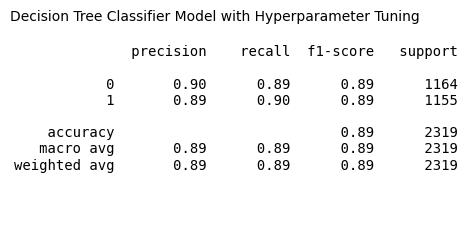

In [205]:
#บันทึกผลลัพธ์ classification_report เป็นรูปภาพ
plt.figure(figsize=(5,0.5))
plt.title('Decision Tree Classifier Model with Hyperparameter Tuning ', pad=120, fontsize=10, loc='left')
plt.text(0.01, 1.05, report_DT_best, {'fontsize': 10}, fontproperties='monospace')
plt.axis('off')  # ปิดแกนกราฟ
# plt.savefig('Classification Report_Decision Tree_hyperparameters.png', bbox_inches='tight', dpi=300)

### - KNeighborsClassifier

In [212]:
#ฝึกโมเดล Decision Tree โดยใช้พารามิเตอร์ที่ดีที่สุด

# สร้างอ็อบเจ็กต์ model_best_RF ของ KNeighborsClassifier โดยใช้พารามิเตอร์ที่ดีที่สุดที่ได้จากการค้นหาคือ 
# {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
model_best_KNN = KNeighborsClassifier(metric='manhattan',n_neighbors=1,weights='uniform')

#ใช้ฟังก์ชัน fit เพื่อฝึกโมเดลด้วยข้อมูลฝึก (X_train_selector และ y_train)
model_best_KNN.fit(X_train_selector,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [216]:
#ใช้โมเดล model_best_DT ที่ฝึกมาทำการทำนายผลของข้อมูลทดสอบ (X_test_selector) และเก็บผลลัพธ์ไว้ในตัวแปร y_pred_best_DT
y_pred_best_KNN = model_best_KNN.predict(X_test_selector)

In [ ]:
from sklearn import metrics
confusion_matrix_KNN_best = metrics.confusion_matrix(y_test, y_pred_best_KNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_KNN_best)
cm_display.plot()
plt.show()

<Figure size 500x500 with 0 Axes>

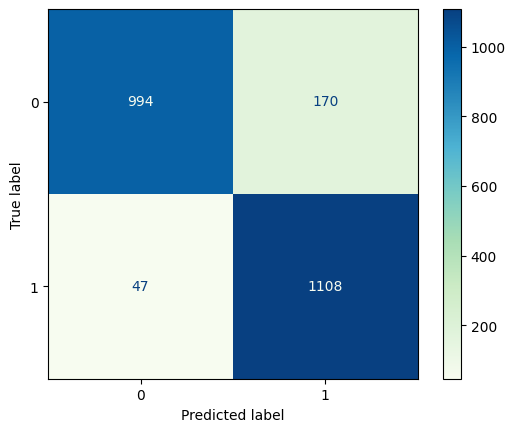

In [214]:
#การประเมินผลลัพธ์ของโมเดลโดยใช้เมทริกซ์ความสับสน (ConfusionMatrix)

#เรียกใช้งานฟังก์ชัน confusion_matrix เพื่อคำนวณเมทริกซ์ความสับสน โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่ทำนาย (y_pred_RF)
confusion_matrix_KNN_best = metrics.confusion_matrix(y_test, y_pred_best_KNN)

#ใช้ ConfusionMatrixDisplay เพื่อสร้างและแสดงกราฟของเมทริกซ์ความสับสน
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_KNN_best)

#บันทึกผล ConfusionMatrix เป็นรูปภาพ
plt.figure(figsize=(5,5))
cm_display.plot(cmap=plt.cm.GnBu)
plt.savefig('ConfusionMatrix_K-nearest Neighbors_hyperparameters.png')

#โชว์ผล ConfusionMatrix
plt.show()

In [217]:
#ใช้ฟังก์ชัน classification_report เพื่อคำนวณและเก็บรายงานความแม่นยำของโมเดล โดยเปรียบเทียบค่าจริง (y_test) กับค่าที่คาดการณ์ (y_pred_RF)
report_KNN_best = metrics.classification_report(y_test,y_pred_best_KNN)
print('K-nearest Neighbors Classifier Model with Hyperparameter Tuning ')
print(report_KNN_best)

K-nearest Neighbors Classifier Model with Hyperparameter Tuning 
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1164
           1       0.87      0.96      0.91      1155

    accuracy                           0.91      2319
   macro avg       0.91      0.91      0.91      2319
weighted avg       0.91      0.91      0.91      2319



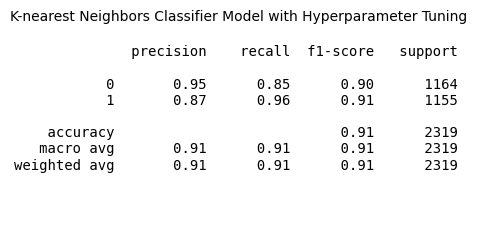

In [219]:
#บันทึกผลลัพธ์ classification_report เป็นรูปภาพ
plt.figure(figsize=(5,0.5))
plt.title('K-nearest Neighbors Classifier Model with Hyperparameter Tuning ', pad=120, fontsize=10, loc='left')
plt.text(0.01, 1.05, report_KNN_best, {'fontsize': 10}, fontproperties='monospace')
plt.axis('off')  # ปิดแกนกราฟ
# plt.savefig('Classification Report_K-nearest Neighbors_hyperparameters.png', bbox_inches='tight', dpi=300)

In [221]:
#แสดงค่า Accuracy เป็นรูปแบบเปอร์เซ็นต์

score_best_RF=round(metrics.accuracy_score(y_test,y_pred_best_RF)*100,2)
score_best_DT=round(metrics.accuracy_score(y_test,y_pred_best_DT)*100,2)
score_best_KNN=round(metrics.accuracy_score(y_test,y_pred_best_KNN)*100,2)

print(f"The Accuracy score achieved using RandomForest is: {score_best_RF} % \n")
print(f"The Accuracy score achieved using DecisionTree is: {score_best_DT} % \n") 
print(f"The Accuracy score achieved using KNeighbors is: {score_best_KNN} %")

The Accuracy score achieved using RandomForest is: 93.75 % 

The Accuracy score achieved using DecisionTree is: 89.26 % 

The Accuracy score achieved using KNeighbors is: 90.64 %


## Save The Best Model

In [ ]:
import pickle
with open('model_stroke.pkl','wb') as f:
    pickle.dump(model_rf_sm_hyper, f)